In [6]:
import pandas as pd

In [7]:
# 파일 불러오기
# df = pd.read_csv('/content/drive/MyDrive/data/2019-Oct.csv')
# df = pd.read_csv('/content/drive/MyDrive/data/2019-Nov.csv')
# df = pd.read_csv('/content/drive/MyDrive/data/2019-Dec.csv')
# df = pd.read_csv('/content/drive/MyDrive/data/2020-Jan.csv')
# df = pd.read_csv('/content/drive/MyDrive/data/2020-Feb.csv')
# df = pd.read_csv('/content/drive/MyDrive/data/2020-Mar.csv')
# df = pd.read_csv('/content/drive/MyDrive/data/2020-Apr.csv')
df = pd.read_parquet('/content/drive/MyDrive/data/cart_purchase_only.parquet')

In [8]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
0,2019-10-01 00:02:14+00:00,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564,2019-10-01,0,electronics,smartphone,None,None
1,2019-10-01 00:04:37+00:00,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,2019-10-01,0,electronics,smartphone,None,None
2,2019-10-01 00:09:26+00:00,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553,2019-10-01,0,electronics,audio,headphone,None
3,2019-10-01 00:09:33+00:00,cart,1002524,2053013555631882655,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,2019-10-01,0,electronics,smartphone,None,None
4,2019-10-01 00:09:54+00:00,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68,2019-10-01,0,electronics,audio,headphone,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17075548,2020-03-31 23:59:35+00:00,cart,100011103,2053013554658804075,electronics.audio.headphone,acer,385.57,522177285,902aa3e5-957a-49e4-8638-ddbbe895808a,2020-03-31,23,electronics,audio,headphone,None
17075549,2020-03-31 23:59:35+00:00,cart,8700232,2232732089587859740,appliances.personal.hair_cutter,vitek,38.59,571822727,dabea208-878f-45bf-9865-fca43b201874,2020-03-31,23,appliances,personal,hair_cutter,None
17075550,2020-03-31 23:59:44+00:00,cart,100006963,2232732099754852875,appliances.personal.massager,yasin,163.16,629229484,c00a1636-dfc2-4e96-a6a3-7fd979e93789,2020-03-31,23,appliances,personal,massager,None
17075551,2020-03-31 23:59:50+00:00,cart,1701027,2232732099981345295,appliances.personal.massager,samsung,154.42,572260610,2e16ffb5-996f-40d3-b98e-ddc53b546357,2020-03-31,23,appliances,personal,massager,None


In [ ]:
# 결측치 확인
df.isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,0
brand,826039
price,0
user_id,0
user_session,68
event_date,0


In [9]:
df['category_lvl1'].value_counts()

,count
category_lvl1,
construction,7090597
electronics,4428961
appliances,2891651
apparel,1577830
sport,1086514


In [10]:
import numpy as np
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 실제 TTF 파일 경로 (예: 나눔고딕)
font_path = '/content/drive/MyDrive/NanumFontSetup_TTF_ALL/NanumGothic.ttf'

# 폰트 등록 및 적용
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)

# 구매 평균 주기

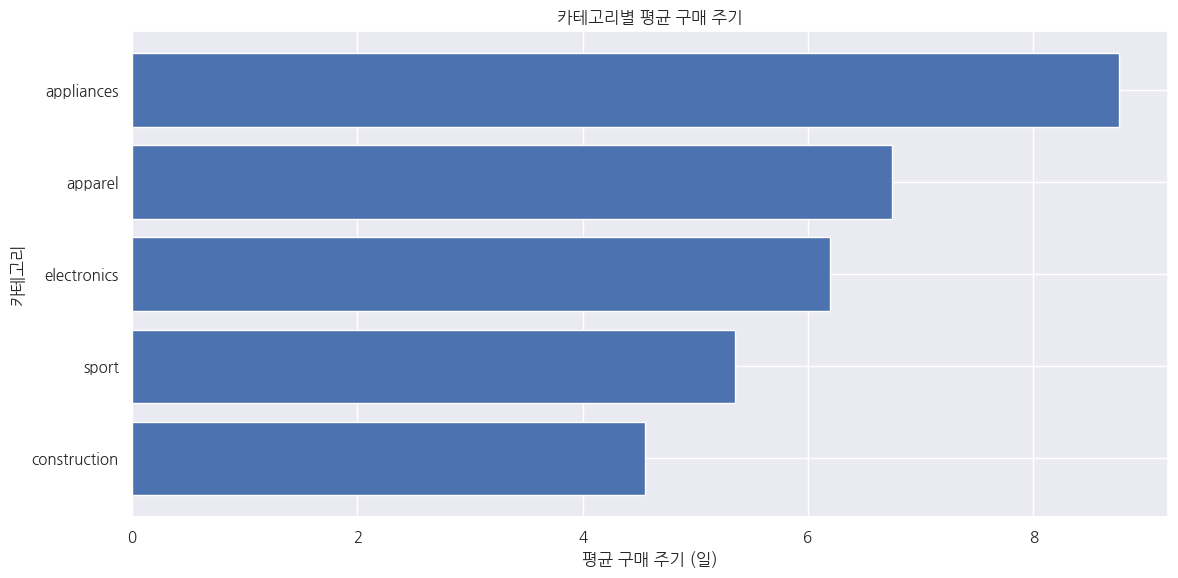

In [ ]:
# 구매 데이터 필터링
purchase_df = df[df['event_type'] == 'purchase'].copy()
purchase_df['event_time'] = pd.to_datetime(purchase_df['event_time'], utc=True)

# 정렬 후 이전 구매시점 계산
purchase_df.sort_values(by=['user_id', 'category_lvl1', 'event_time'], inplace=True)
purchase_df['prev_time'] = purchase_df.groupby(['user_id', 'category_lvl1'])['event_time'].shift(1)
purchase_df['interval_days'] = (purchase_df['event_time'] - purchase_df['prev_time']).dt.days

# category별 평균 구매 주기 계산
category_cycle = purchase_df.groupby('category_lvl1')['interval_days'].mean().dropna().reset_index()
category_cycle = category_cycle.sort_values(by='interval_days')

# 시각화
plt.figure(figsize=(12, 6))
plt.barh(category_cycle['category_lvl1'], category_cycle['interval_days'])
plt.xlabel('평균 구매 주기 (일)')
plt.ylabel('카테고리')
plt.title('카테고리별 평균 구매 주기')
plt.tight_layout()
plt.show()


# 구매자들 행동 특성

In [ ]:
# 구매 데이터만 추출
purchase_df = df[df['event_type'] == 'purchase'].copy()
purchase_df['event_time'] = pd.to_datetime(purchase_df['event_time'], utc=True)

In [ ]:
# 사용자별 카테고리 구매 요약
user_category_summary = purchase_df.groupby(['user_id', 'category_lvl1']).agg(
    purchase_count=('event_type', 'count'),
    total_spent=('price', 'sum'),
    first_purchase=('event_time', 'min'),
    last_purchase=('event_time', 'max'),
    unique_brands=('brand', pd.Series.nunique)
).reset_index()

# 구매 주기 계산
user_category_summary['purchase_cycle'] = (
    (user_category_summary['last_purchase'] - user_category_summary['first_purchase']).dt.days
)


In [ ]:
# 카테고리별 평균값 집계
category_profile = user_category_summary.groupby('category_lvl1').agg(
    avg_purchase_count=('purchase_count', 'mean'),
    avg_total_spent=('total_spent', 'mean'),
    avg_purchase_cycle=('purchase_cycle', 'mean'),
    avg_brand_variety=('unique_brands', 'mean'),
    num_unique_users=('user_id', 'nunique')
).round(2).reset_index()


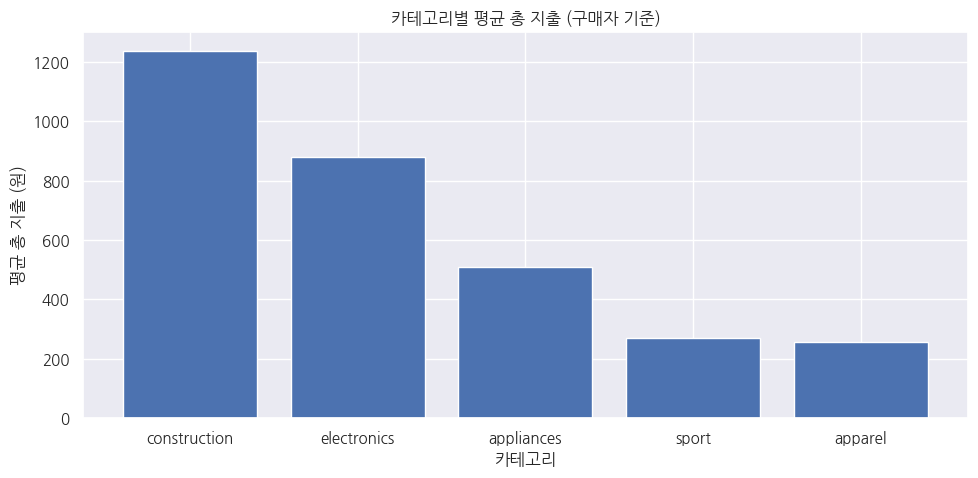

In [ ]:
import matplotlib.pyplot as plt

top5 = category_profile.sort_values(by='avg_total_spent', ascending=False).head(5)

plt.figure(figsize=(10,5))
plt.bar(top5['category_lvl1'], top5['avg_total_spent'])
plt.title("카테고리별 평균 총 지출 (구매자 기준)")
plt.ylabel("평균 총 지출 (달러)")
plt.xlabel("카테고리")
plt.grid(True)
plt.tight_layout()
plt.show()


### 카테고리별 구매자 유형 분포 분석
분석 목적:
어떤 카테고리는 한 번만 구매하는 유저가 많고,
어떤 카테고리는 재구매 고객 비율이 높을 수 있음

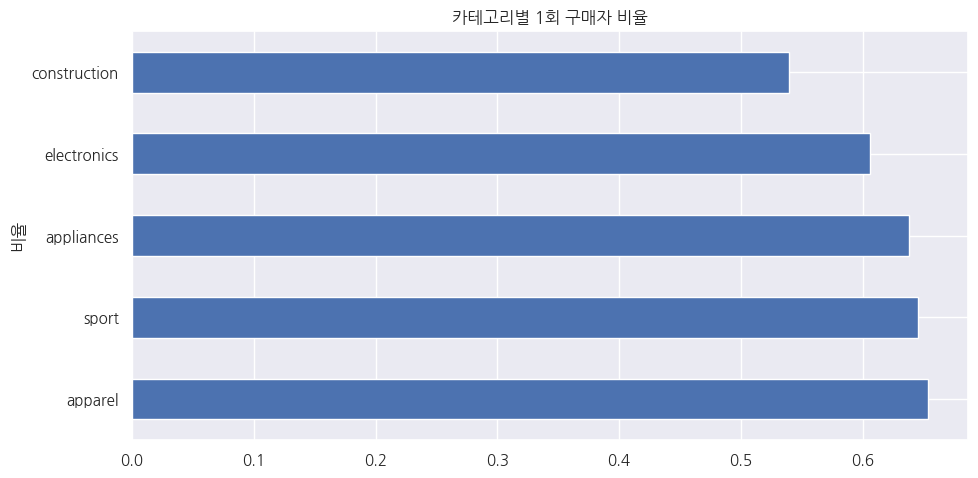

In [ ]:
# 유저-카테고리별 구매 횟수 계산
user_cat_counts = purchase_df.groupby(['user_id', 'category_lvl1']).size().reset_index(name='purchase_count')

# 구매 횟수 1회 vs 다회 비율 계산
user_cat_counts['buyer_type'] = user_cat_counts['purchase_count'].apply(lambda x: 'one-time' if x == 1 else 'repeat')

category_type_dist = user_cat_counts.groupby(['category_lvl1', 'buyer_type']).size().unstack(fill_value=0)

# 비율 계산
category_type_dist['one_time_ratio'] = category_type_dist['one-time'] / (category_type_dist.sum(axis=1))

# 시각화
category_type_dist['one_time_ratio'].sort_values(ascending=False).plot(kind='barh', figsize=(10,5))
plt.title('카테고리별 1회 구매자 비율')
plt.ylabel('비율')
plt.tight_layout()
plt.show()


### 카테고리별 구매 전환율 분석 (cart → purchase)
분석 목적:
카테고리별로 "장바구니에 넣지만 구매는 잘 안 되는" 곳이 어디인지 파악

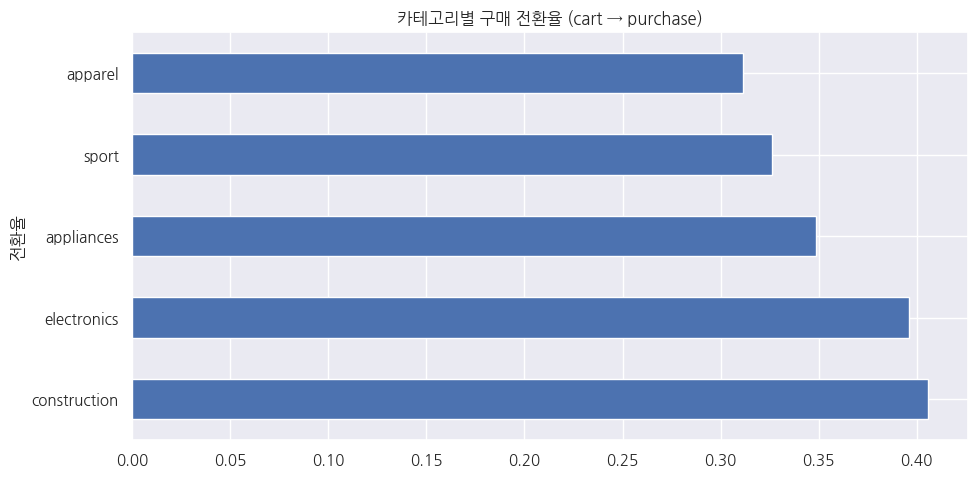

In [ ]:
# cart와 purchase 수를 category 기준으로 집계
cart_counts = df[df['event_type'] == 'cart'].groupby('category_lvl1').size()
purchase_counts = df[df['event_type'] == 'purchase'].groupby('category_lvl1').size()

conversion_rate = (purchase_counts / cart_counts).dropna().sort_values(ascending=False)

# 시각화
conversion_rate.plot(kind='barh', figsize=(10,5))
plt.title('카테고리별 구매 전환율 (cart → purchase)')
plt.ylabel('전환율')
plt.tight_layout()
plt.show()

### 카테고리별 브랜드 집중도
분석 목적:
어떤 카테고리는 특정 브랜드 의존도가 높고,
어떤 카테고리는 유저들이 브랜드를 다양하게 고르는 경향이 있음

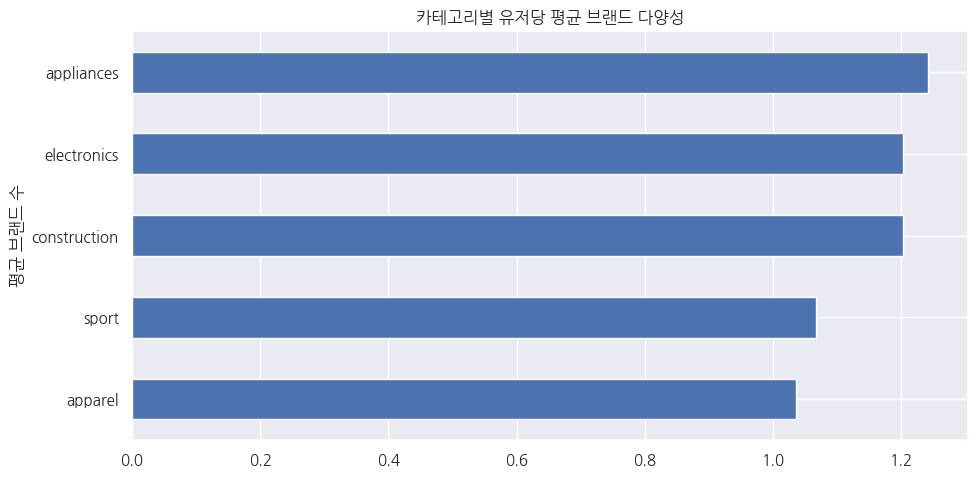

In [ ]:
brand_diversity = purchase_df.groupby(['category_lvl1', 'user_id'])['brand'].nunique().reset_index()
brand_diversity_avg = brand_diversity.groupby('category_lvl1')['brand'].mean()

brand_diversity_avg.sort_values().plot(kind='barh', figsize=(10,5))
plt.title("카테고리별 유저당 평균 브랜드 다양성")
plt.ylabel("평균 브랜드 수")
plt.tight_layout()
plt.show()

| 분석 방식         | 파악할 수 있는 인사이트       |
| ------------- | ------------------- |
| ✅ 구매 횟수 유형 분석 | 충성 고객 vs 1회 고객      |
| ✅ 전환율 분석      | 관심은 많지만 구매율 낮은 카테고리 |
| ✅ 브랜드 다양성     | 충성 브랜드 선호 여부        |
| ✅ 총 지출/주기     | 고가/저가, 정기 구매 성향     |

# 유저 요약 테이블 생성

In [ ]:
# 구매 여부 플래그 생성
df['event_time'] = pd.to_datetime(df['event_time'], utc=True)
df['is_purchase'] = df['event_type'] == 'purchase'

# 유저별 요약 정보
user_summary = df.groupby('user_id').agg(
    view_count=('event_type', lambda x: (x == 'view').sum()),
    cart_count=('event_type', lambda x: (x == 'cart').sum()),
    purchase_count=('event_type', lambda x: (x == 'purchase').sum()),
    total_spent=('price', lambda x: x[df.loc[x.index, 'event_type'] == 'purchase'].sum()),
    brand_diversity=('brand', pd.Series.nunique),
    category_diversity=('category_lvl1', pd.Series.nunique),
    first_event=('event_time', 'min'),
    last_event=('event_time', 'max')
).reset_index()

# 체류 일수
user_summary['active_days'] = (user_summary['last_event'] - user_summary['first_event']).dt.days


# 구매자 / 비구매자 나누기

In [ ]:
user_summary['group'] = user_summary['purchase_count'].apply(lambda x: '구매자' if x > 0 else '비구매자')


# 그룹별 평균 비교

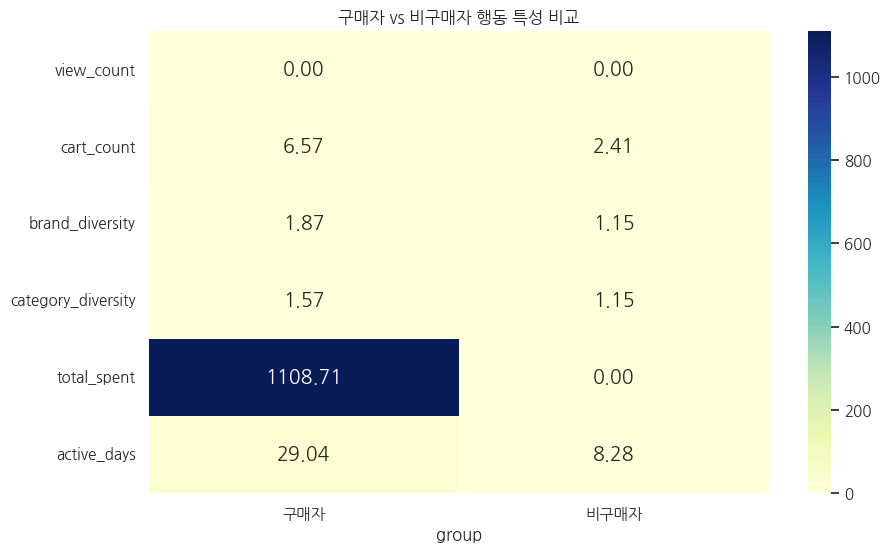

In [ ]:
compare_cols = ['view_count', 'cart_count', 'brand_diversity',
                'category_diversity', 'total_spent', 'active_days']

group_stats = user_summary.groupby('group')[compare_cols].mean().round(2).T
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(group_stats, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("구매자 vs 비구매자 행동 특성 비교")
plt.show()
